# Tratamiento de dataframe de empresas

## Business Questions

1. ¿How is the quantity of employees distributed across the differen ecuadorian regions? ¿How to/should we factor in company size? 
2. ¿?
3. ¿Whats the importance/contribution of company size when looking into the total workforce of the country?

## Setup

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Data/rankingCVSV.csv',sep=';', encoding='latin')
df.head()

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,2020,2019,EXPEDIENTE,NOMBRE,TIPO COMPAÑIA,ACTIVIDAD ECONÓMICA,REGION,PROVINCIA,CIUDAD,TAMAÑO,SECTOR,CANT. EMPLEADOS,ACTIVO2020,PATRIMONIO2020,INGRESOS POR VENTA2020,UTILIDAD ANTES DE 2020,UTILIDAD DEL EJERCICIO2020,UTILIDAD NETA2020,IR CAUSADO2020,INGRESO TOTAL2020
0,1.0,1,384.0,CORPORACION FAVORITA C.A.,ANÓNIMA,G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,MERCADO DE VALORES,"10,768.00","2,121,860,458.59","1,482,973,135.","2,170,602,774.","187,168,402.3","220,198,120.31","147,499,234.25","41,971,212.00","2,170,602,774.93"
1,2.0,4,6796.0,ECUACORRIENTE S.A.,ANÓNIMA,B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...,ORIENTE,ZAMORA CHINCHIPE ...,EL PANGUI ...,GRANDE,SOCIETARIO,966.00,"1,607,423,376.00","568,986,647.0",0.00,"-1,387,158.70",0.00,"-2,633,855.70","1,246,697.02",0.00
2,3.0,3,93144.0,AURELIAN ECUADOR S.A,ANÓNIMA,B0899.09 - EXTRACCIÓN DE OTROS MINERALES: ASBE...,ORIENTE,ZAMORA CHINCHIPE ...,LOS ENCUENTROS ...,GRANDE,SOCIETARIO,"1,451.00","1,599,727,165.00","605,293,529.0","358,792,587.0","-49,399,080.0","-49,399,080.00","-49,399,080.00",0.00,"358,823,965.00"
3,4.0,2,705547.0,SHAYA ECUADOR S.A.,ANÓNIMA,B0910.01 - ACTIVIDADES DE SERVICIOS DE EXTRACC...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,SOCIETARIO,92.00,"1,354,952,445.00","786,817,297.0","669,076,072.0","179,317,070.0","210,961,259.00","133,709,258.00","45,607,812.10","669,076,072.00"
4,5.0,5,47845.0,CONSORCIO ECUATORIANO DE TELECOMUNICACIONES S....,ANÓNIMA,"J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...",COSTA,GUAYAS ...,GUAYAQUIL ...,GRANDE,SOCIETARIO,"2,844.00","1,217,718,379.00","264,709,114.0","1,066,241,897.","174,644,376.0","204,823,940.00","106,826,750.00","67,817,626.00","1,071,561,214.00"


## Cleaning

### Eliminating NaN

In [3]:
# For now, we'll use the strategy of ignoring companies whose values are not available
df.dropna(inplace=True)
df.head(10)

,2020,2019,EXPEDIENTE,NOMBRE,TIPO COMPAÑIA,ACTIVIDAD ECONÓMICA,REGION,PROVINCIA,CIUDAD,TAMAÑO,SECTOR,CANT. EMPLEADOS,ACTIVO2020,PATRIMONIO2020,INGRESOS POR VENTA2020,UTILIDAD ANTES DE 2020,UTILIDAD DEL EJERCICIO2020,UTILIDAD NETA2020,IR CAUSADO2020,INGRESO TOTAL2020
0,1.0,1,384.0,CORPORACION FAVORITA C.A.,ANÓNIMA,G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,MERCADO DE VALORES,"10,768.00","2,121,860,458.59","1,482,973,135.","2,170,602,774.","187,168,402.3","220,198,120.31","147,499,234.25","41,971,212.00","2,170,602,774.93"
1,2.0,4,6796.0,ECUACORRIENTE S.A.,ANÓNIMA,B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...,ORIENTE,ZAMORA CHINCHIPE ...,EL PANGUI ...,GRANDE,SOCIETARIO,966.00,"1,607,423,376.00","568,986,647.0",0.00,"-1,387,158.70",0.00,"-2,633,855.70","1,246,697.02",0.00
2,3.0,3,93144.0,AURELIAN ECUADOR S.A,ANÓNIMA,B0899.09 - EXTRACCIÓN DE OTROS MINERALES: ASBE...,ORIENTE,ZAMORA CHINCHIPE ...,LOS ENCUENTROS ...,GRANDE,SOCIETARIO,"1,451.00","1,599,727,165.00","605,293,529.0","358,792,587.0","-49,399,080.0","-49,399,080.00","-49,399,080.00",0.00,"358,823,965.00"
3,4.0,2,705547.0,SHAYA ECUADOR S.A.,ANÓNIMA,B0910.01 - ACTIVIDADES DE SERVICIOS DE EXTRACC...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,SOCIETARIO,92.00,"1,354,952,445.00","786,817,297.0","669,076,072.0","179,317,070.0","210,961,259.00","133,709,258.00","45,607,812.10","669,076,072.00"
4,5.0,5,47845.0,CONSORCIO ECUATORIANO DE TELECOMUNICACIONES S....,ANÓNIMA,"J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...",COSTA,GUAYAS ...,GUAYAQUIL ...,GRANDE,SOCIETARIO,"2,844.00","1,217,718,379.00","264,709,114.0","1,066,241,897.","174,644,376.0","204,823,940.00","106,826,750.00","67,817,626.00","1,071,561,214.00"
5,6.0,7,143615.0,CONSORCIO SHUSHUFINDI S.A.,ANÓNIMA,B0910.01 - ACTIVIDADES DE SERVICIOS DE EXTRACC...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,SOCIETARIO,39.00,"914,184,335.00","838,006,103.0","291,248,873.0","92,380,051.70","108,682,413.00","70,961,856.10","21,418,195.60","291,252,869.00"
7,7.0,8,93325.0,CORPORACION QUIPORT S.A.,ANÓNIMA,M7020.04 - PRESTACIÓN DE ASESORAMIENTO Y AYUDA...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,SOCIETARIO,70.00,"814,067,849.00","212,852,599.0","17,650,644.20","-27,053,323.0","-27,053,323.10","-27,053,323.00",0.00,"83,530,647.90"
8,8.0,9,2913.0,CORPORACION EL ROSADO S.A.,ANÓNIMA,G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...,COSTA,GUAYAS ...,GUAYAQUIL ...,GRANDE,MERCADO DE VALORES,3.00,"754,024,531.84","283,755,098.2","1,249,085,559.","39,246,084.65","46,171,864.30","27,622,934.68","11,328,623.69","1,265,116,683.48"
9,9.0,11,10532.0,HIDALGO E HIDALGO S.A.,ANÓNIMA,"F4210.11 - CONSTRUCCIÓN DE CARRETERAS, CALLES,...",SIERRA,PICHINCHA ...,QUITO ...,GRANDE,SOCIETARIO,"1,144.00","749,530,535.00","652,393,996.0","115,979,619.0","33,867,923.10","39,844,616.00","26,384,065.20","7,483,857.89","158,895,431.00"
10,10.0,6,47972.0,OTECEL S.A.,ANÓNIMA,"J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...",SIERRA,PICHINCHA ...,QUITO ...,GRANDE,MERCADO DE VALORES,905.00,"745,272,999.60","230,674,502.0","444,508,999.7","-21,301,000.0","-21,301,626.91","-17,245,260.43",0.00,"468,804,782.94"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75165 entries, 0 to 79043
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   2020                        75165 non-null  float64
 1   2019                        75165 non-null  object 
 2   EXPEDIENTE                  75165 non-null  float64
 3   NOMBRE                      75165 non-null  object 
 4   TIPO COMPAÑIA               75165 non-null  object 
 5   ACTIVIDAD ECONÓMICA         75165 non-null  object 
 6   REGION                      75165 non-null  object 
 7   PROVINCIA                   75165 non-null  object 
 8   CIUDAD                      75165 non-null  object 
 9   TAMAÑO                      75165 non-null  object 
 10  SECTOR                      75165 non-null  object 
 11  CANT. EMPLEADOS             75165 non-null  object 
 12  ACTIVO2020                  75165 non-null  object 
 13  PATRIMONIO2020              751

Now we need to clean certain nonsensical unique values in the columns "TAMAÑO" and "SECTOR". We found those by cheching each column with df["column_name"].unique()

### "SECTOR" Column

In [9]:
# SECTOR unique values
df["SECTOR"].unique()

array(['MERCADO DE VALORES', 'SOCIETARIO'], dtype=object)

In [10]:
# We check which companies have the non-sensical value in "SECTOR"
df.loc[df.SECTOR == "MERCADO DE ", "NOMBRE"]

Series([], Name: NOMBRE, dtype: object)

In [11]:
def clean_sector(row):
  if(row == "MERCADO DE "):
    return "MERCADO DE VALORES"
  return row

df["SECTOR"] = df["SECTOR"].apply(clean_sector)

In [12]:
df.SECTOR.unique()

array(['MERCADO DE VALORES', 'SOCIETARIO'], dtype=object)

### "TAMAÑO" Column

In [13]:
# "TAMAÑO" unique values
df["TAMAÑO"].unique()

array(['GRANDE', 'MEDIANA', 'MICROEMPRESA', 'PEQUEÑA', 'MICROEMPRES'],
      dtype=object)

In [14]:
# We check which companies have the non-sensical value in "TAMAÑO" (271 companies)
df.loc[df.TAMAÑO == "MICROEMPRES", "NOMBRE"].shape

(273,)

In [15]:
def clean_tamano(row):
  if(row == "MICROEMPRES"):
    return "MICROEMPRESA"
  return row

df["TAMAÑO"] = df["TAMAÑO"].apply(clean_tamano)

In [16]:
# We make sure it's clean now (0 companies)
df.loc[df.TAMAÑO == "MICROEMPRES", "NOMBRE"].shape

(0,)

In [17]:
df.TAMAÑO.unique()

array(['GRANDE', 'MEDIANA', 'MICROEMPRESA', 'PEQUEÑA'], dtype=object)

### Misc

"CORPORACIÓN EL ROSADO" is one of the biggest companies in Ecuador, so we know it's impossible that it only has 3 employees, regardless of what the SuperCIAS say in their 
report. 

After some investigation, there is a another report by the SuperCias that show the real number of employees from "EL ROSADO".

In [18]:
# We change the original value of employees to the actual value
df.loc[8, "CANT. EMPLEADOS"]

'3.00'

In [19]:
df.loc[8, "CANT. EMPLEADOS"] = 7334

In [20]:
df.loc[8, "CANT. EMPLEADOS"]

7334

## Data Type Conversion

In [21]:
# df[['REGION', 'NOMBRE']].groupby('REGION').count()

In [26]:
# Convert columns to a more appropiate data type 
df = df.convert_dtypes()
df.dtypes

2020                           Int64
2019                          string
EXPEDIENTE                     Int64
NOMBRE                        string
TIPO COMPAÑIA                 string
ACTIVIDAD ECONÓMICA           string
REGION                        string
PROVINCIA                     string
CIUDAD                        string
TAMAÑO                        string
SECTOR                        string
CANT. EMPLEADOS                Int64
ACTIVO2020                    object
PATRIMONIO2020                string
INGRESOS POR VENTA2020        string
UTILIDAD ANTES DE 2020        string
UTILIDAD DEL EJERCICIO2020    string
UTILIDAD NETA2020             string
IR CAUSADO2020                string
INGRESO TOTAL2020             string
dtype: object

In [25]:
# Create numerical column of employees per company
df['CANT. EMPLEADOS'] = df['CANT. EMPLEADOS'].str.replace(',','')
df['CANT. EMPLEADOS'] = pd.to_numeric(df['CANT. EMPLEADOS'])
df['NUMERO_EMPLEADOS'].sum()

AttributeError: Can only use .str accessor with string values!

## First Business Question
1. ¿How is the quantity of employees distributed across the different ecuadorian regions? ¿How to/should we factor in company size? 

<AxesSubplot:xlabel='REGION', ylabel='CANT. EMPLEADOS'>

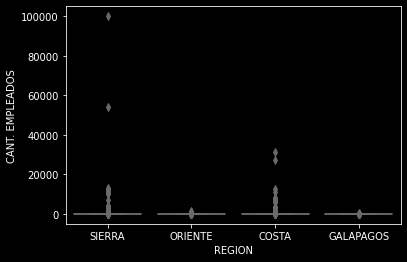

In [30]:
# The first things is to see the data as it is. Let's take a look at the distribution of employees when pitted agains ecuadorian regions.
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df)

### Plot Analysis:
This result might seem discouraging, however it might conceal some important insights. One can see that there are a couple of points that go well beyond the box in all 4 ecuadorian regions; most notably "SIERRA" and "COSTA". 

Normally, an analysis and treatment to eliminate outliers might be in order, however, outliers in this regard are imporant, they represent (usually) the most important (and big in terms of hiring) companies of the country. So cutting them out is out of the question.

This unreadable chart might have to do something with most of businesses having very few employees. Let's take a closer look.

<AxesSubplot:xlabel='REGION', ylabel='CANT. EMPLEADOS'>

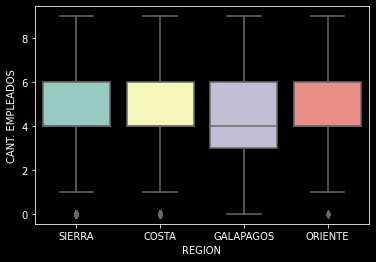

In [29]:
# Let's create a copy of the original data frame in order to visualize only companies with less than 10 employees
df2 = df.loc[df["CANT. EMPLEADOS"] < 10]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df2)

In [38]:
# Let's compare the number companies above 10,000 employees vs the number of companies with less than 10.
num_big_comp = str(df.loc[ df["CANT. EMPLEADOS"] >= 10000, "NOMBRE"].shape[0])
num_small_comp = str(df.loc[ df["CANT. EMPLEADOS"] < 10, "NOMBRE"].shape[0])
print("Number of companies with 10,000 or more employees: " + num_big_comp + "\nNumber of companies with less than 10 employees: " + num_small_comp)

Number of companies with 10,000 or more employees: 13
Number of companies with less than 10 employees: 62178


### Plot Analysis and data analysis
This validates our previous suspicions. The first plot was graphically squashed due to the giant disparity between the amount of employees that companies hold. Almost all companies (82.72%) have less than 10 workers however the "outliers" having more than 10,000 employees represent a fundamental part of the ecuadorian workforce, therefore, cannot be eliminated.

### Course of action
Taking into account company size will help visualize the distribution of workers accross regions better, in other words, let's take into account the size size of the company as well.

In [40]:
# First let's take a look at the standard deviation depending on region
df[["REGION", "CANT. EMPLEADOS"]].groupby("REGION").agg('std')

,CANT. EMPLEADOS
REGION,
COSTA,255.032530
GALAPAGOS,20.317047
ORIENTE,47.301414
SIERRA,642.850603


In [42]:
# Now let's take a look at the standard deviation between regions taking into account size of the company
df[["TAMAÑO", "REGION", "CANT. EMPLEADOS"]].groupby(["REGION", "TAMAÑO"]).agg('std')

CANT. EMPLEADOS
REGION    TAMAÑO                       
COSTA     GRANDE             965.770662
          MEDIANA             44.251405
          MICROEMPRESA        80.846087
          PEQUEÑA            325.933751
GALAPAGOS GRANDE                    NaN
          MEDIANA             31.476068
          MICROEMPRESA         5.629651
          PEQUEÑA              9.498558
ORIENTE   GRANDE             407.419235
          MEDIANA             28.848805
          MICROEMPRESA         4.999994
          PEQUEÑA             10.690359
SIERRA    GRANDE            2937.556695
          MEDIANA            225.397981
          MICROEMPRESA       407.947178
          PEQUEÑA            111.646027

### Data analysis:
This might seem impossible or counter-intuitive at first. How is it possible that by grouping together companies by size the deviation dramatically increases compared to when it is not grouped by size? In reality the data it's trying to tell us that there's even more disparity in the amount of employees that companies of the same size have than when we ignore sizes all together.

This might mean that there are serious outliers within the categories of "TAMAÑO", when it comes to employees. Maybe the SuperCias doesn't prioritize number of employees as a factor for categorizing companies in size. 

<AxesSubplot:xlabel='REGION', ylabel='CANT. EMPLEADOS'>

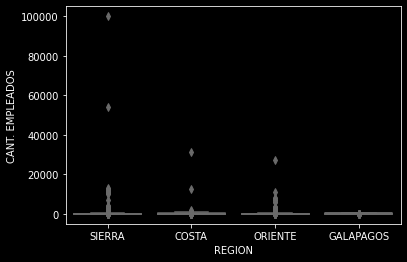

In [50]:
# Let's confirm our suspicions of intra-company-size outliers.
df3 = df.loc[df["TAMAÑO"] == "GRANDE"]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df3)

<AxesSubplot:xlabel='REGION', ylabel='CANT. EMPLEADOS'>

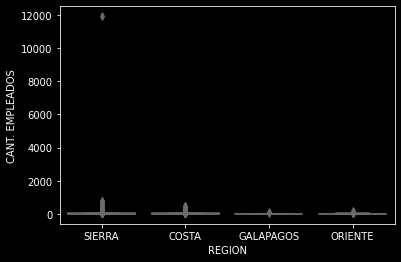

In [51]:
df4 = df.loc[df["TAMAÑO"] == "MEDIANA"]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df4)

<AxesSubplot:xlabel='REGION', ylabel='CANT. EMPLEADOS'>

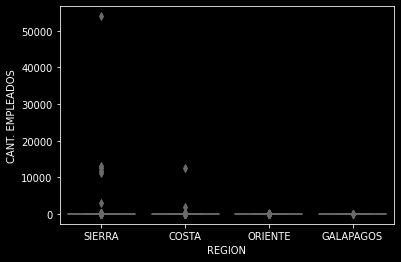

In [52]:
df5 = df.loc[df["TAMAÑO"] == "MICROEMPRESA"]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df5)

<AxesSubplot:xlabel='REGION', ylabel='CANT. EMPLEADOS'>

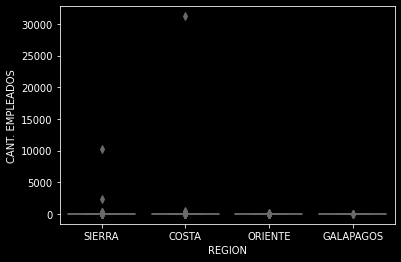

In [53]:
df6 = df.loc[df["TAMAÑO"] == "PEQUEÑA"]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df6)



### Course of action 
Create our own size of company column based on number of employees alone.

In [68]:
df['TAMAÑO_EMPLEADOS'] = pd.qcut(df["CANT. EMPLEADOS"], 5 ,labels=['MICROEMPRESA','PEQUEÑA', 'MEDIANA', 'GRANDE'], duplicates='drop')

In [66]:
df.groupby("TAMAÑO_EMPLEADOS")["CANT. EMPLEADOS"].agg('std')


TAMAÑO_EMPLEADOS
MICROEMPRESA       0.810450
PEQUEÑA            0.476345
MEDIANA            0.499967
GRANDE          1063.884133
Name: CANT. EMPLEADOS, dtype: float64

### Analysis
With this we can conlcude that there is a huge disparity in employee number in the top quartile of companies while and values seem quite uniform in the remaining 3 quartiles. Most disparity in employee quantity happens in the top companies.

In [ ]:
# TODO
# 1. mira si baja un poco esa salvajada si haces deciles o percentiles
# 2. Una alternativa si no hay algo bueno con eso es analizar por region solo los tres primers quartiles y decir que el ultimo tiene demasiada dispersion
# 3. Grafica eso en un facetgrid o en varios box plot, analiza la grafica y concluye
# grid de la distribucion por region y por tamaño (facet grid de boxplots o violinplots)